In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

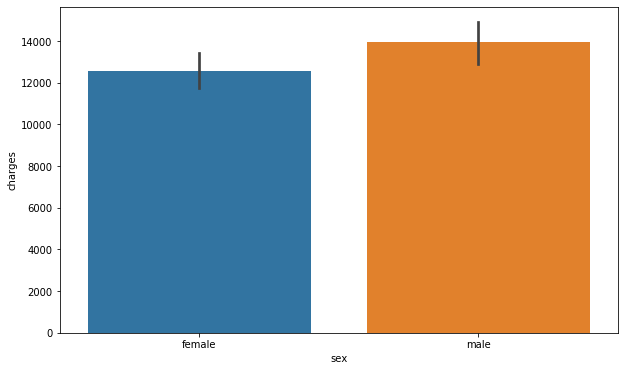

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data['sex'], data['charges'])

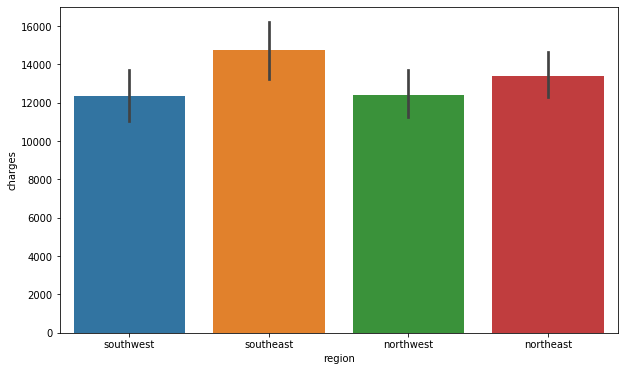

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data['region'], data['charges'])

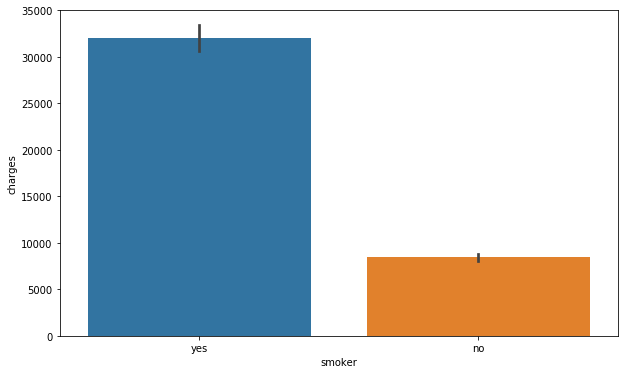

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data['smoker'], data['charges'])

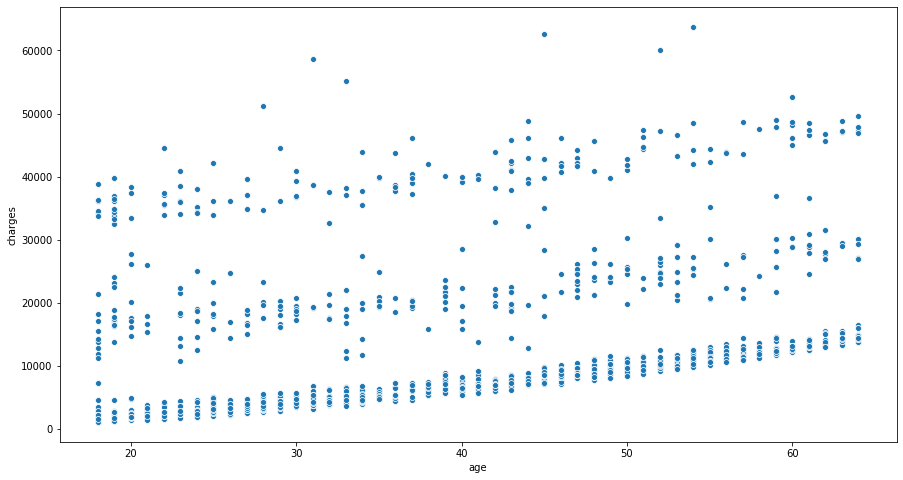

In [11]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data['age'], data['charges'])

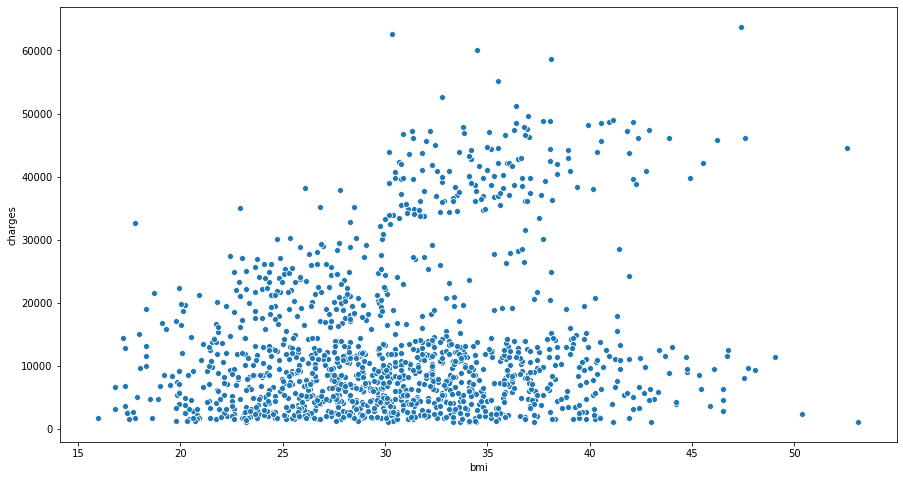

In [12]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data['bmi'], data['charges'])

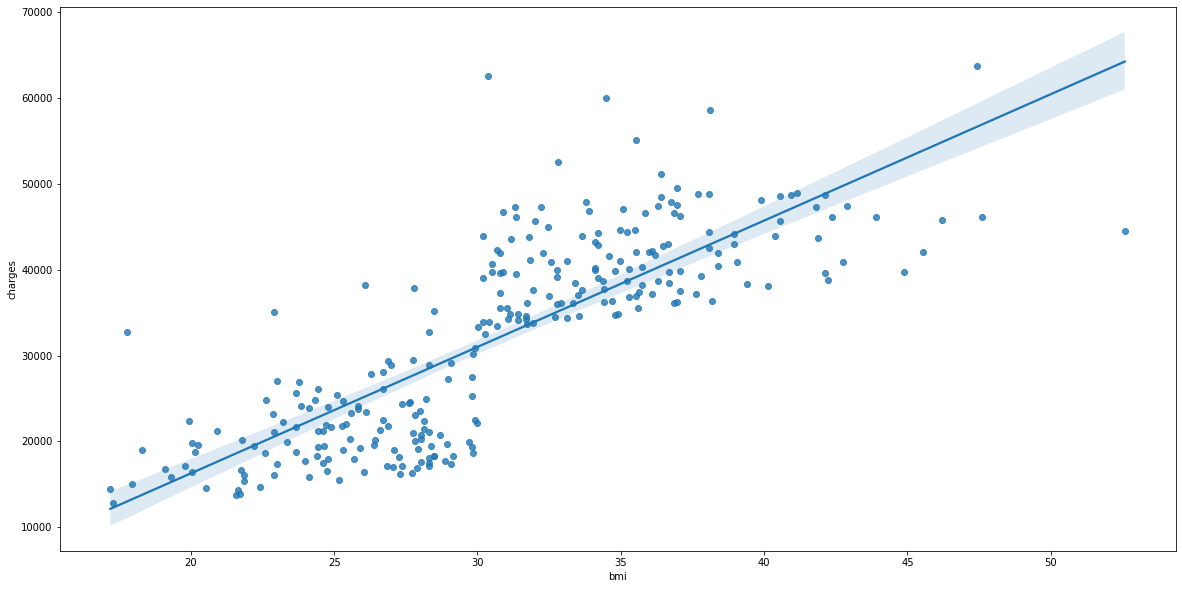

In [13]:
plt.figure(figsize=(20, 10))

x_1 = data[data['smoker'] == 'yes']['bmi']
y_1 = data[data['smoker'] == 'yes']['charges']
sns.regplot(x_1, y_1)


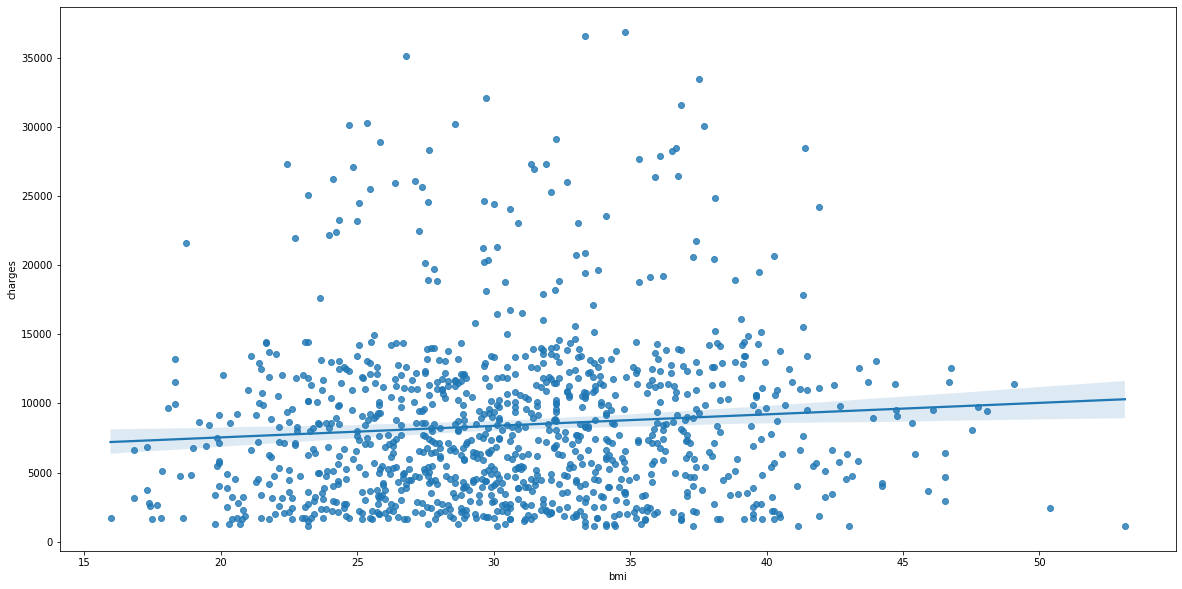

In [14]:
plt.figure(figsize=(20, 10))

x_2 = data[data['smoker'] == 'no']['bmi']
y_2 = data[data['smoker'] == 'no']['charges']
sns.regplot(x_2, y_2)

In [15]:
data.insert(6, 'label_corr', 1)
data.loc[(data['bmi'] < 30) & (data['smoker'] == 'yes'), 'label_corr'] = 2
data.loc[(data['bmi'] >= 30) & (data['smoker'] == 'yes'), 'label_corr'] = 3

data

,age,sex,bmi,children,smoker,region,label_corr,charges
0,19,female,27.900,0,yes,southwest,2,16884.92400
1,18,male,33.770,1,no,southeast,1,1725.55230
2,28,male,33.000,3,no,southeast,1,4449.46200
3,33,male,22.705,0,no,northwest,1,21984.47061
4,32,male,28.880,0,no,northwest,1,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,1,10600.54830
1334,18,female,31.920,0,no,northeast,1,2205.98080
1335,18,female,36.850,0,no,southeast,1,1629.83350
1336,21,female,25.800,0,no,southwest,1,2007.94500


In [16]:
mct = make_column_transformer(
    (OneHotEncoder(), ['sex', 'smoker', 'region']), remainder='passthrough'
)
data = mct.fit_transform(data)

In [17]:
st = StandardScaler()
data = st.fit_transform(data)
data

array([[ 1.0105187 , -1.0105187 , -1.97058663, ..., -0.90861367,
         1.04520869,  0.2985838 ],
       [-0.98959079,  0.98959079,  0.5074631 , ..., -0.07876719,
        -0.47654237, -0.95368917],
       [-0.98959079,  0.98959079,  0.5074631 , ...,  1.58092576,
        -0.47654237, -0.72867467],
       ...,
       [ 1.0105187 , -1.0105187 ,  0.5074631 , ..., -0.90861367,
        -0.47654237, -0.96159623],
       [ 1.0105187 , -1.0105187 ,  0.5074631 , ..., -0.90861367,
        -0.47654237, -0.93036151],
       [ 1.0105187 , -1.0105187 , -1.97058663, ..., -0.90861367,
         1.04520869,  1.31105347]])

In [18]:
X = data[:, :-1]
y = data[:, -1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.20817038615377498

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8494942787829438

In [24]:
y_p = model.predict(X_train)
mean_absolute_error(y_train, y_p)

0.20290750853712766